In [47]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import  RootMeanSquaredError
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv("../../data/eventData.csv")
df.head()

,segmentsTimeStamps,buffering,SegmentStart,SegmentEnd,timeStamp,bitrateNewTrack,bitrateOldTrack,streamBandwidth,estimatedBandwidth,segmentsContentType,bandwidthSpeeds,decodedFrame,droppedFrame
0,252.4,1,-0.003,0.997,2024-08-27T09:56:59.410Z,4844528,0,4844528,5.017675e+07,audio,0,4,0
1,258.0,0,0.000,1.000,2024-08-27T09:57:03.790Z,4844528,0,4844528,7.110392e+07,video,0,11,0
2,277.6,0,0.997,1.997,2024-08-27T09:57:04.064Z,4844528,0,4844528,7.110392e+07,audio,0,19,0
3,283.9,0,1.000,2.000,2024-08-27T09:57:04.328Z,4844528,0,4844528,7.110392e+07,video,0,27,0
4,290.3,0,1.997,2.997,2024-08-27T09:57:04.590Z,4844528,0,4844528,7.110392e+07,audio,0,35,0


In [ ]:
x = np.array(df[["streamBandwidth","bitrateNewTrack","bitrateOldTrack"]])
y = np.array(df["estimatedBandwidth"])

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=1)
])
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error'])
model.fit(X_train,y_train,epochs=100, batch_size=5, validation_split=0.2, verbose=1)

In [ ]:
pred = model.predict(X_test)
r2 = r2_score(pred,y_test)
r2

In [5]:
df = df.loc[:890]

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df_chg= df.set_index(['timeStamp'], drop=True)

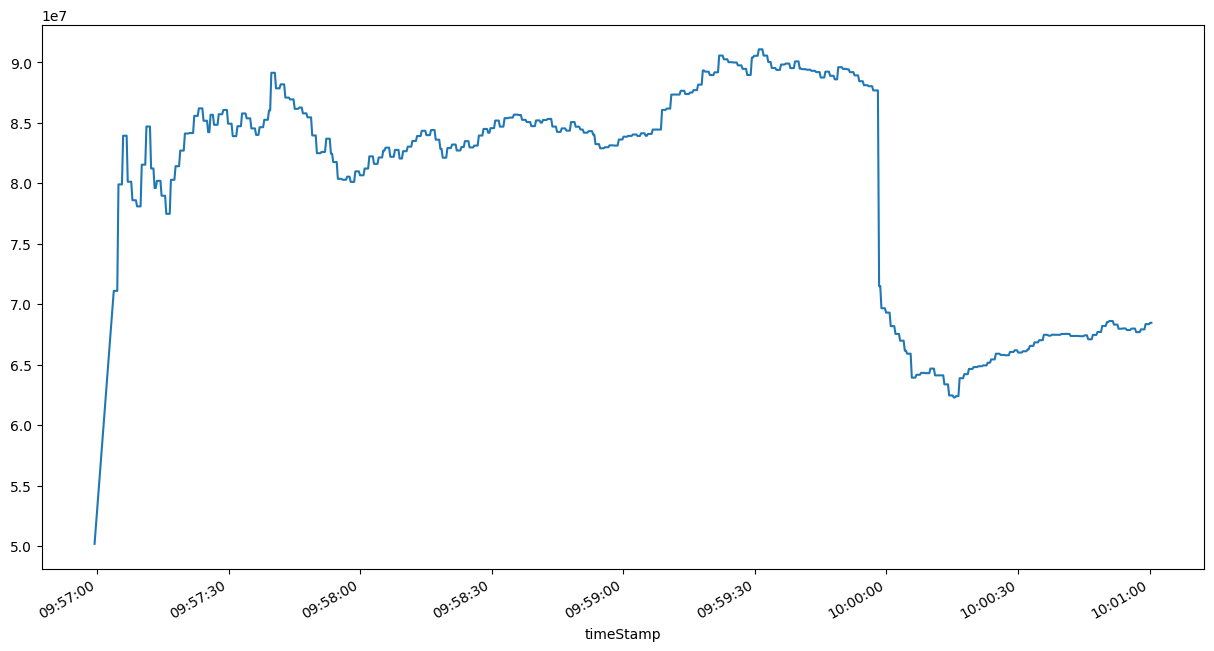

In [7]:
plt.figure(figsize=(15,8))
df_chg['estimatedBandwidth'].plot();

In [22]:
split_date = pd.Timestamp('2024-08-27 09:59:30.154000+00:00')
df1 = df_chg['estimatedBandwidth'] 
train = df1.loc[:split_date]
test = df1.loc[split_date:]

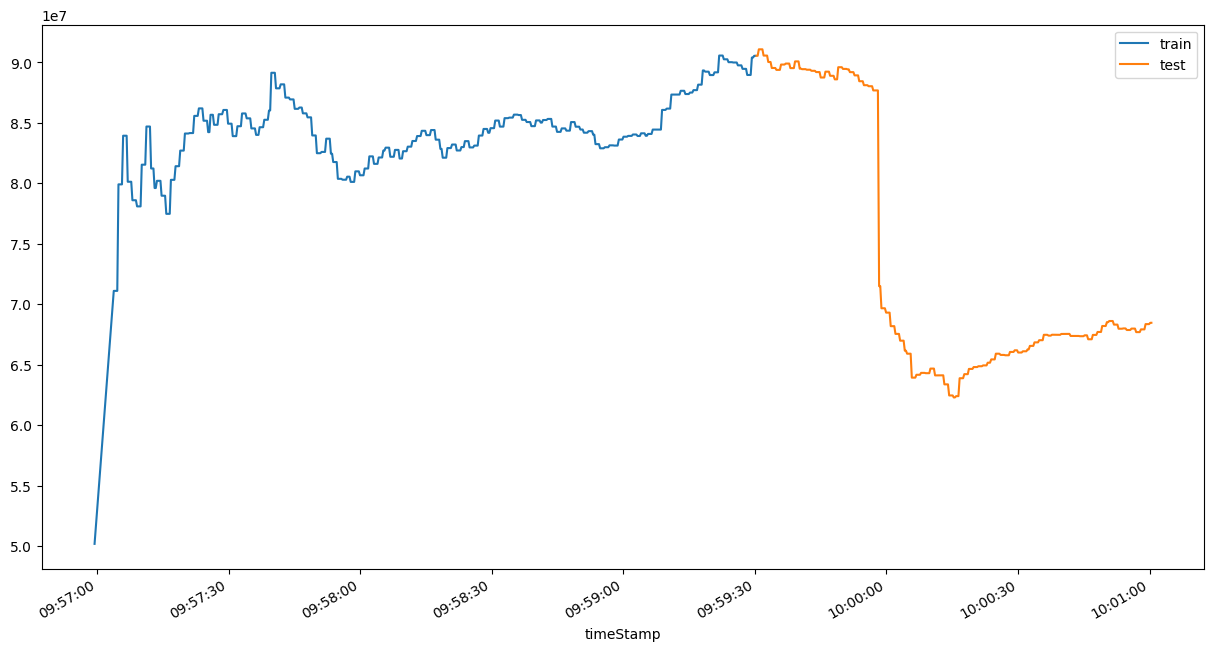

In [23]:
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [24]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 552 train values
We have 339 test values


In [37]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:700]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[0:800:1]

print(f"test_processed {test_processed.shape} \n")
print(f"train_processed {train_processed.shape} \n")


test_processed (800, 1) 

train_processed (700, 1) 



In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [39]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

print(X_test.shape)

(799, 1)


In [40]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lea))
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100


d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3285
Epoch 2/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0392
Epoch 3/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0108
Epoch 4/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 0.0145
Epoch 5/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0075
Epoch 6/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 7/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0017
Epoch 8/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0011
Epoch 9/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8073e-04
Epoch 10/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3065e-04
Epoch 11/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9638e-04
Epoch 12/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4087e-04
Epoch 13/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6004e-05
Epoch 14/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6773e-05
Epoch 15/100
699/699 ━━━━━━━━

In [41]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The R2 score on the Train set is:	0.999
The R2 score on the Test set is:	0.999


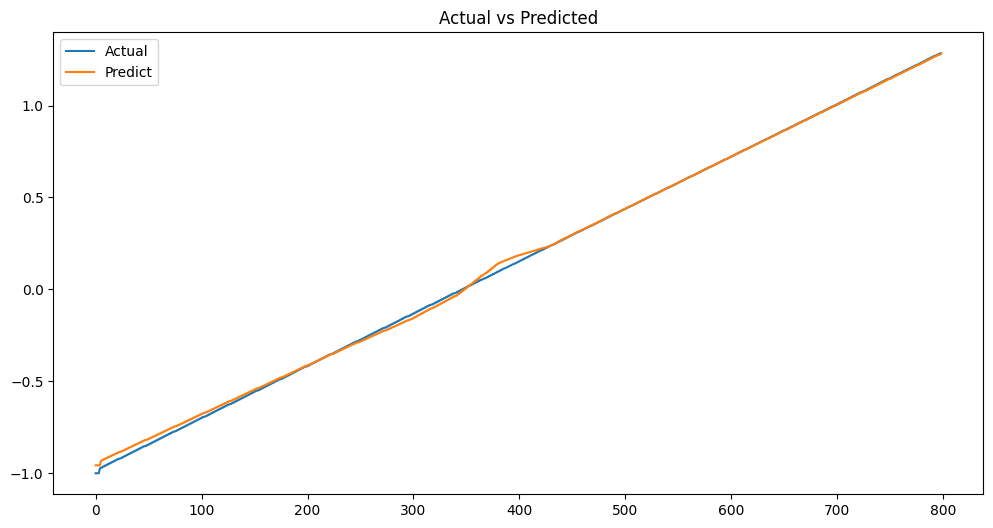

In [42]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test_nn, label='Predict')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [45]:
foredcasting = np.array([12,15,17]).reshape(-1,1)
foredcasting_transform = scaler.fit_transform(foredcasting)
y_new = nn_model.predict(foredcasting_transform)

sclaed = scaler.inverse_transform(y_new)
sclaed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[12.108188],
       [15.039617],
       [17.000814]], dtype=float32)